In [16]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [9]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/임대차3법(54,752건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

blog = load_all_data()

## 블로그 Sheet

In [10]:
blog.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2     33
Unnamed: 3    142
dtype: int64

In [11]:
blog.columns = blog.iloc[0]
blog.drop(0, inplace=True, axis=0)
blog = blog.dropna(axis=0, how='any')
blog = blog[~blog['내용'].str.contains('http')]
blog = blog[blog['내용'].str.contains('[가-힣]')]
blog = blog[blog['내용'].str.len() < 1000]

print(blog.shape)
blog.head()

(2224, 4)


,작성일,작성자,제목,내용
20,2020/07/28,hosabi55,"'임대차3법'에 ‘전월세대란’, ‘세입자불안’ 걱정하는듯 언론도 아무말대잔치","<0728 중도정론 표방 한국 기사 비교> \n'임대차3법'에 ‘전월세대란’, ‘세..."
46,2020/10/14,gg-bar,'민관협력 경기도 임대차3법 상담센터 설치' 업무협약을 체결 (20.09.22.),경기중앙지방변호사회는 정부의 임대차3법 시행에 따른 주택시장의 혼란을 최소화하기 위...
68,2020/07/26,namchuldo,[타박이] 임대차3법 계약갱신청구 거절 가능 사유에 집주인의 실거주 포함 예정,7/26/2020 처음 7/26/2020 \n \n7월26일 발표된 국토교통부의 ...
75,2020/11/11,chl3594,"대전 전세,월세 임대차3법 알아야!(2탄)","대전 전세,월세 계약시 \n임대차3법 알아야 후회없다(2탄) \n \n지난번 포스..."
102,2020/07/22,osanv,[현장의 소리]전세계약시 특약 넣어도 임대차3법 소급적용시 유효할까?,"결론부터 말하자면, \n임대차3법 피하려고 특약을 넣어도 소급적용시 효력이 없다. ..."


In [12]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [31]:
tfidf_blog = tfdif(blog['내용'])

In [ ]:
# import pickle

# tfidf_blog.to_pickle('./tfidf_df/tfidf_blog.pkl')

In [14]:
tfidf_blog

,000,01,010,03,031,04,07,10,100만원,100만원의,...,현재,현행,혜택,혜택을,혹은,혼란을,홍남기,확대,확정일자,확정일자를
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079832,0.0,0.0,0.0,0.0,0.119447,0.0,0.220481,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087202,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.077507,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105554,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


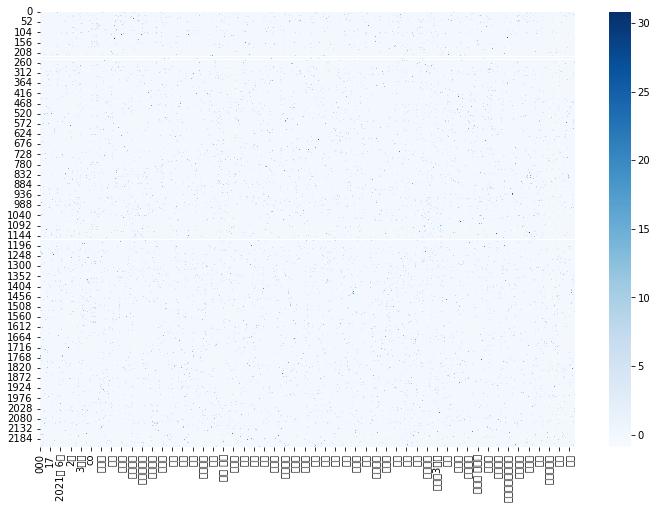

In [32]:
tfidf_blog = (tfidf_blog - tfidf_blog.mean()) / tfidf_blog.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_blog, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above